<a href="https://colab.research.google.com/github/gokul-pv/EVA6_Assignments_Session11/blob/main/Custom_YoloV3/EVA6_Session_11_CustomData_YoloV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Download the repo**

In [2]:
!git clone https://github.com/theschoolofai/YoloV3.git /content/gdrive/MyDrive/EVA/custom_yolo

Cloning into '/content/gdrive/MyDrive/EVA/custom_yolo'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 21.86 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
%cd /content/gdrive/MyDrive/EVA/custom_yolo

/content/gdrive/MyDrive/EVA/custom_yolo


Copy weights

In [4]:
!mkdir weights

In [5]:
!cp /content/gdrive/MyDrive/EVA/weights/yolov3-spp-ultralytics.pt  /content/gdrive/MyDrive/EVA/custom_yolo/weights

Copy custom dataset

In [6]:
!cp /content/gdrive/MyDrive/EVA/dataset/customdata.zip  /content/gdrive/MyDrive/EVA/custom_yolo/data

In [7]:
!unzip /content/gdrive/MyDrive/EVA/custom_yolo/data/customdata.zip -d /content/gdrive/MyDrive/EVA/custom_yolo/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/EVA/custom_yolo/data/customdata/images/K15.jpg  
  inflating: /content/gdrive/MyDrive/EVA/custom_yolo/data/customdata/images/K150.jpg  
  inflating: /content/gdrive/MyDrive/EVA/custom_yolo/data/customdata/images/K153.jpg  
  inflating: /content/gdrive/MyDrive/EVA/custom_yolo/data/customdata/images/K156.jpg  
  inflating: /content/gdrive/MyDrive/EVA/custom_yolo/data/customdata/images/K157.jpg  
  inflating: /content/gdrive/MyDrive/EVA/custom_yolo/data/customdata/images/K158.jpg  
  inflating: /content/gdrive/MyDrive/EVA/custom_yolo/data/customdata/images/K159.jpg  
  inflating: /content/gdrive/MyDrive/EVA/custom_yolo/data/customdata/images/K16.jpg  
  inflating: /content/gdrive/MyDrive/EVA/custom_yolo/data/customdata/images/K160.jpg  
  inflating: /content/gdrive/MyDrive/EVA/custom_yolo/data/customdata/images/K161.jpg  
  inflating: /content/gdrive/MyDrive/EVA/custom_yolo/data/customdata/images/K165.

**Copy the custom yolo config file**

In [8]:
! cp /content/gdrive/MyDrive/EVA/configFiles/yolov3-custom.cfg /content/gdrive/MyDrive/EVA/custom_yolo/cfg

In [3]:
! ls -l

total 3305
drwx------ 2 root root    4096 Aug  7 18:18  annotation_tool
drwx------ 2 root root    4096 Aug  7 18:18  cfg
drwx------ 2 root root    4096 Aug  7 18:18  data
-rw------- 1 root root    7993 Aug  7 18:18  detect.py
drwx------ 2 root root    4096 Aug  7 18:48  input_images
drwx------ 2 root root    4096 Aug  7 18:48  input_video
-rw------- 1 root root   21790 Aug  7 18:18  models.py
drwx------ 2 root root    4096 Aug  7 18:18  output
drwx------ 2 root root    4096 Aug  8 07:10  output_images
drwx------ 2 root root    4096 Aug  8 07:11  output_video
drwx------ 2 root root    4096 Aug  7 18:18  __pycache__
-rw------- 1 root root    3704 Aug  7 18:18  README.md
-rw------- 1 root root  246121 Aug  7 18:18  results.json
-rw------- 1 root root  187564 Aug  8 05:20  results.png
-rw------- 1 root root   45300 Aug  8 05:20  results.txt
drwx------ 2 root root    4096 Aug  7 18:31  runs
-rw------- 1 root root 1235240 Aug  7 19:20  test_batch0.png
-rw------- 1 root root   11406 Aug  7 18

In [4]:
!cat data/customdata/train.txt | tail -5

./data/customdata/images/custom_obj4_020
./data/customdata/images/custom_obj4_021
./data/customdata/images/custom_obj4_022
./data/customdata/images/custom_obj4_023
./data/customdata/images/custom_obj4_024

In [5]:
!cat data/customdata/custom.data

classes=4
train=data/customdata/train.txt
valid=data/customdata/test.txt
names=data/customdata/custom.names

**Import libraries**

In [6]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)



**Test the pipeline by training on small coco dataset**

In [7]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

2021-08-07 19:16:47.248879: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 1285.83it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 98.30it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 

**Train for 300 epochs using custom dataset**

In [8]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 

# --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

2021-08-07 19:17:49.018253: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2863 found, 131 missing, 38 empty, 0 duplicate, for 3032 images): 100% 3032/3032 [00:02<00:00, 1205.52it/s]
Caching images (1.7GB): 100% 3032/3032 [00:25<00:00, 118.28it/s]
Caching labels (297 found, 14 missing, 7 empty, 0 duplicate, for 318 images):

**Predict on images to detect classes**

In [15]:
! mkdir input_images
! mkdir input_video
! mkdir output_images
! mkdir output_video

In [17]:
! cp -r /content/gdrive/MyDrive/EVA/Session\ 11/input_images/* /content/gdrive/MyDrive/EVA/custom_yolo/input_images/

In [18]:
! cp -r /content/gdrive/MyDrive/EVA/Session\ 11/input_video/* /content/gdrive/MyDrive/EVA/custom_yolo/input_video/

In [7]:
!python detect.py --conf-thres 0.3 --source /content/gdrive/MyDrive/EVA/custom_yolo/input_images  --output /content/gdrive/MyDrive/EVA/custom_yolo/output_images

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/gdrive/MyDrive/EVA/custom_yolo/output_images', save_txt=False, source='/content/gdrive/MyDrive/EVA/custom_yolo/input_images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/16 /content/gdrive/MyDrive/


**Prediction on video file**

In [26]:
!python detect.py --conf-thres 0.3 --source /content/gdrive/MyDrive/EVA/custom_yolo/input_video --output /content/gdrive/MyDrive/EVA/custom_yolo/output_video

Streaming output truncated to the last 5000 lines.
video 1/1 (815/5812) /content/gdrive/MyDrive/EVA/custom_yolo/input_video/COVID-19 Construction Safety Updates - Full Version.mp4: 320x512 1 vests, Done. (0.014s)
video 1/1 (816/5812) /content/gdrive/MyDrive/EVA/custom_yolo/input_video/COVID-19 Construction Safety Updates - Full Version.mp4: 320x512 1 vests, Done. (0.014s)
video 1/1 (817/5812) /content/gdrive/MyDrive/EVA/custom_yolo/input_video/COVID-19 Construction Safety Updates - Full Version.mp4: 320x512 1 vests, Done. (0.014s)
video 1/1 (818/5812) /content/gdrive/MyDrive/EVA/custom_yolo/input_video/COVID-19 Construction Safety Updates - Full Version.mp4: 320x512 1 vests, Done. (0.015s)
video 1/1 (819/5812) /content/gdrive/MyDrive/EVA/custom_yolo/input_video/COVID-19 Construction Safety Updates - Full Version.mp4: 320x512 1 vests, Done. (0.014s)
video 1/1 (820/5812) /content/gdrive/MyDrive/EVA/custom_yolo/input_video/COVID-19 Construction Safety Updates - Full Version.mp4: 320x512 1

**Predictions for Hardhat, Masks, Vest and Boots**

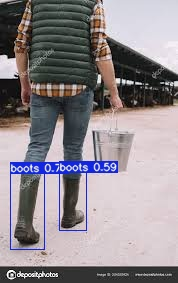

In [8]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj1_003.jpg', width=500)

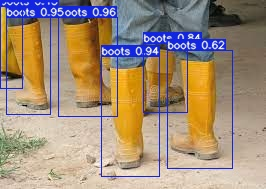

In [11]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj1_015.jpg', width=500)

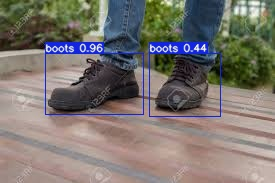

In [12]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj1_016.jpg', width=500)

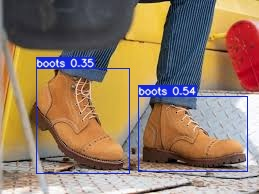

In [13]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj1_024.jpg', width=500)

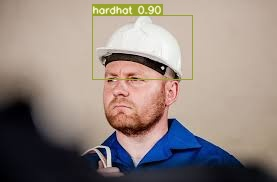

In [14]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj2_001.jpg', width=500)

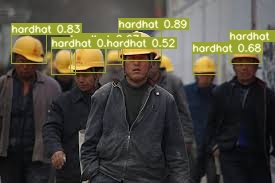

In [15]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj2_003.jpg', width=500)

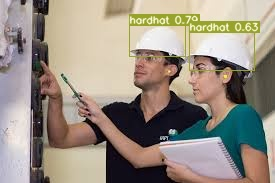

In [16]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj2_006.jpg', width=500)

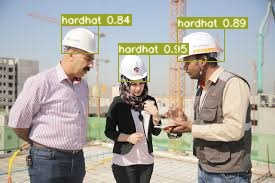

In [17]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj2_009.jpg', width=500)

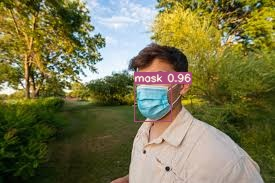

In [18]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj3_001.jpg', width=500)

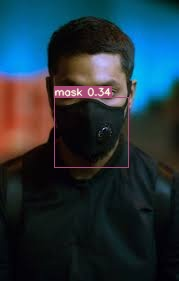

In [19]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj3_011.jpg', width=500)

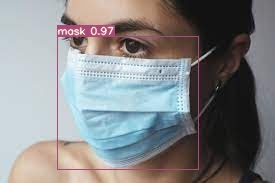

In [20]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj3_017.jpg', width=500)

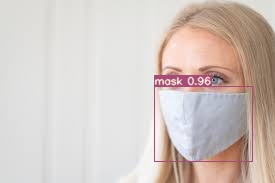

In [21]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj3_023.jpg', width=500)

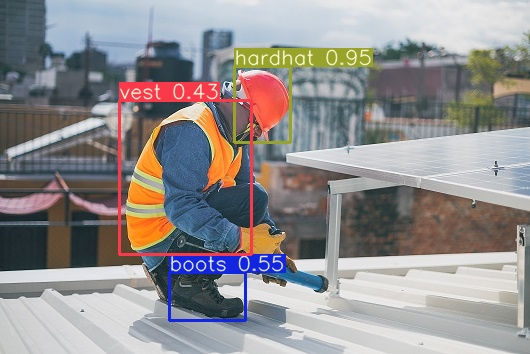

In [22]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj4_008.jpg', width=500)

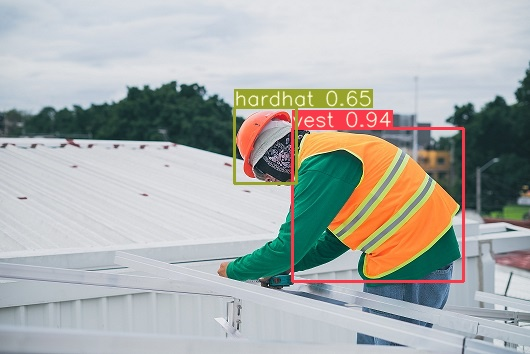

In [23]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj4_009.jpg', width=500)

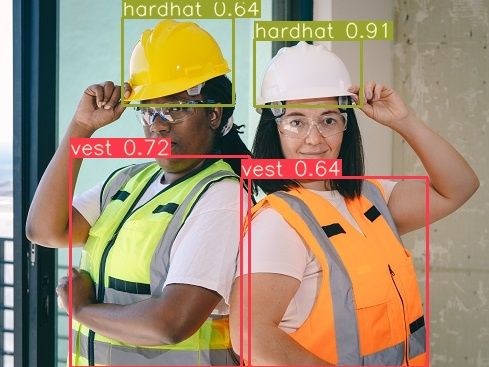

In [24]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj4_015.jpg', width=500)

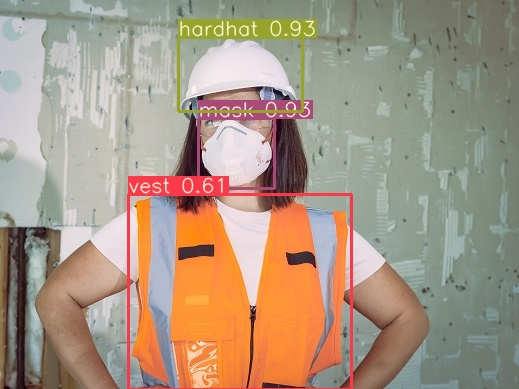

In [25]:
Image(filename='/content/gdrive/MyDrive/EVA/custom_yolo/output_images/custom_obj4_016.jpg', width=500)